# Purpose
This notebook creates a baseline model as a point of reference for future model iterations. This model predicts the total number of significant strikes landed given two fighters average significant strikes landed in all of their previous bouts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import PoissonRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

### Import and split

In [ ]:
data = pd.read_csv('../../data/model_8_data.csv', index_col=0)
data.head()

In [3]:
data.columns

Index(['ca_sig_str_a_p1m_0', '3fa_sig_str_a_p1m_0', 'ca_td_s_p15m_di_0',
       '3fa_td_s_p15m_di_0', 'ca_sig_str_s_p1m_di_0', '3fa_sig_str_s_p1m_di_0',
       'ca_sig_str_a_p1m_di_0', '3fa_sig_str_a_p1m_di_0',
       'ca_ground_s_p15m_di_0', '3fa_ground_s_p15m_di_0',
       'ca_ground_a_p15m_di_0', '3fa_ground_a_p15m_di_0',
       'ca_clinch_s_p15m_di_0', '3fa_clinch_s_p15m_di_0',
       'ca_clinch_a_p15m_di_0', '3fa_clinch_a_p15m_di_0',
       'ca_distance_a_p1m_di_0', '3fa_distance_a_p1m_di_0',
       'ca_distance_s_p1m_di_0', '3fa_distance_s_p1m_di_0',
       'ca_sig_str_a_p1m_1', '3fa_sig_str_a_p1m_1', 'ca_td_s_p15m_di_1',
       '3fa_td_s_p15m_di_1', 'ca_sig_str_s_p1m_di_1', '3fa_sig_str_s_p1m_di_1',
       'ca_sig_str_a_p1m_di_1', '3fa_sig_str_a_p1m_di_1',
       'ca_ground_s_p15m_di_1', '3fa_ground_s_p15m_di_1',
       'ca_ground_a_p15m_di_1', '3fa_ground_a_p15m_di_1',
       'ca_clinch_s_p15m_di_1', '3fa_clinch_s_p15m_di_1',
       'ca_clinch_a_p15m_di_1', '3fa_clinch_a_p15m_d

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530 entries, 0 to 2529
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ca_sig_str_a_p1m_0       2530 non-null   float64
 1   3fa_sig_str_a_p1m_0      2530 non-null   float64
 2   ca_td_s_p15m_di_0        2530 non-null   float64
 3   3fa_td_s_p15m_di_0       2530 non-null   float64
 4   ca_sig_str_s_p1m_di_0    2530 non-null   float64
 5   3fa_sig_str_s_p1m_di_0   2530 non-null   float64
 6   ca_sig_str_a_p1m_di_0    2530 non-null   float64
 7   3fa_sig_str_a_p1m_di_0   2530 non-null   float64
 8   ca_ground_s_p15m_di_0    2530 non-null   float64
 9   3fa_ground_s_p15m_di_0   2530 non-null   float64
 10  ca_ground_a_p15m_di_0    2530 non-null   float64
 11  3fa_ground_a_p15m_di_0   2530 non-null   float64
 12  ca_clinch_s_p15m_di_0    2530 non-null   float64
 13  3fa_clinch_s_p15m_di_0   2530 non-null   float64
 14  ca_clinch_a_p15m_di_0   

# Ground Strikes

In [9]:
ground_stats = ['ca_ground_s_p15m_di_0', '3fa_ground_s_p15m_di_0',
                'ca_ground_a_p15m_di_0', '3fa_ground_a_p15m_di_0',
                'ca_ground_s_p15m_di_1', '3fa_ground_s_p15m_di_1',
                'ca_ground_a_p15m_di_1', '3fa_ground_a_p15m_di_1',
                'c_sig_str_a_p1m']

In [11]:
data_ground = data.loc[:,ground_stats]

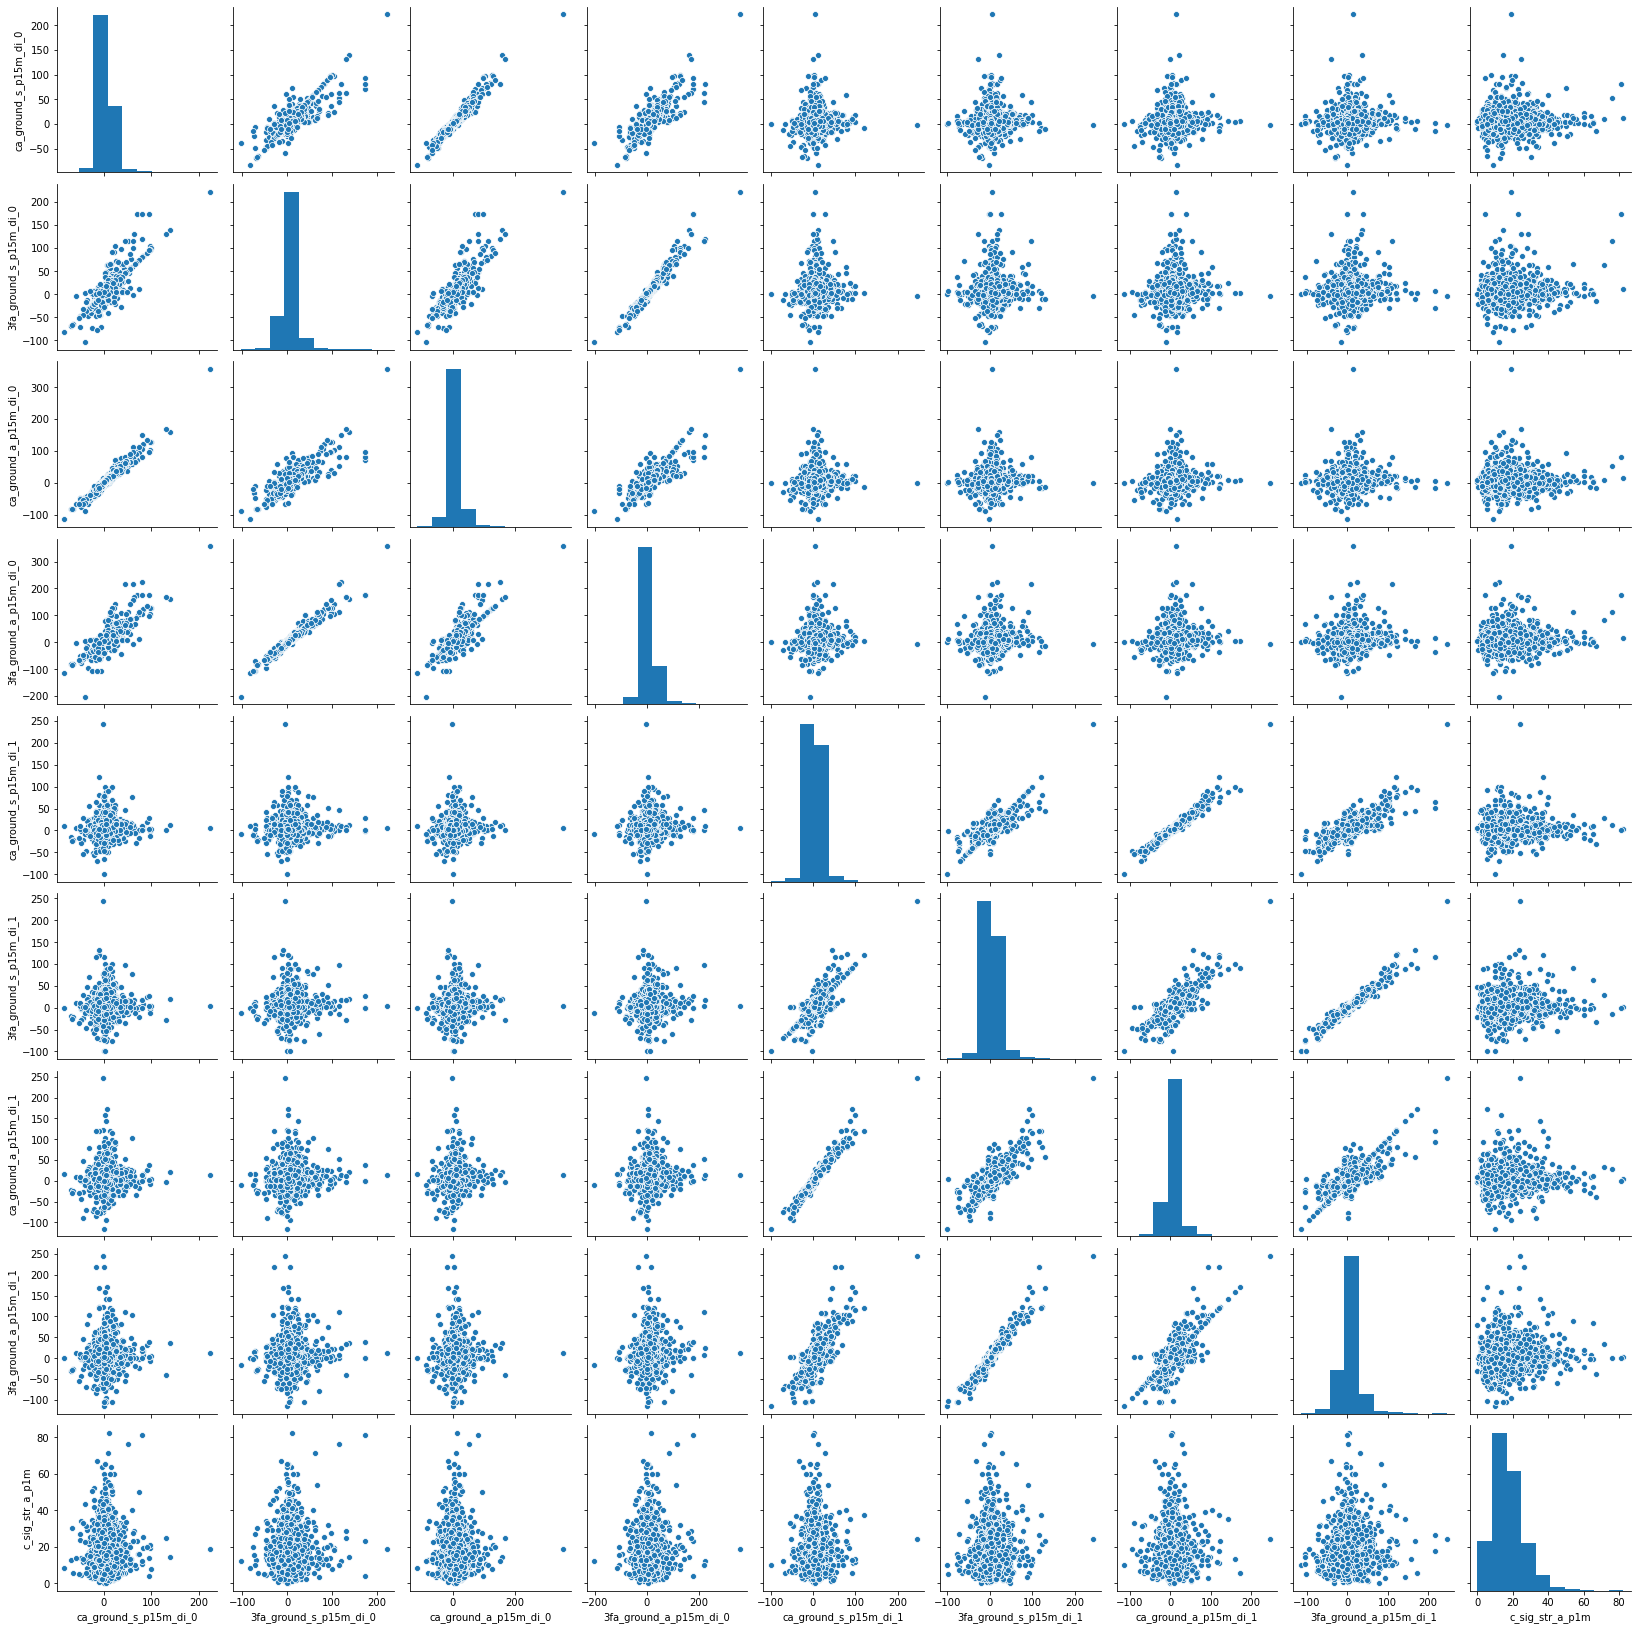

In [12]:
sns.pairplot(data_ground)

# Distance Strikes

In [3]:
data.columns

Index(['ca_sig_str_a_p1m_0', '3fa_sig_str_a_p1m_0', 'ca_td_s_p15m_di_0',
       '3fa_td_s_p15m_di_0', 'ca_sig_str_s_p1m_di_0', '3fa_sig_str_s_p1m_di_0',
       'ca_sig_str_a_p1m_di_0', '3fa_sig_str_a_p1m_di_0',
       'ca_ground_s_p15m_di_0', '3fa_ground_s_p15m_di_0',
       'ca_ground_a_p15m_di_0', '3fa_ground_a_p15m_di_0',
       'ca_clinch_s_p15m_di_0', '3fa_clinch_s_p15m_di_0',
       'ca_clinch_a_p15m_di_0', '3fa_clinch_a_p15m_di_0',
       'ca_distance_a_p1m_di_0', '3fa_distance_a_p1m_di_0',
       'ca_distance_s_p1m_di_0', '3fa_distance_s_p1m_di_0',
       'ca_sig_str_a_p1m_1', '3fa_sig_str_a_p1m_1', 'ca_td_s_p15m_di_1',
       '3fa_td_s_p15m_di_1', 'ca_sig_str_s_p1m_di_1', '3fa_sig_str_s_p1m_di_1',
       'ca_sig_str_a_p1m_di_1', '3fa_sig_str_a_p1m_di_1',
       'ca_ground_s_p15m_di_1', '3fa_ground_s_p15m_di_1',
       'ca_ground_a_p15m_di_1', '3fa_ground_a_p15m_di_1',
       'ca_clinch_s_p15m_di_1', '3fa_clinch_s_p15m_di_1',
       'ca_clinch_a_p15m_di_1', '3fa_clinch_a_p15m_d

In [14]:
distance_stats = ['ca_distance_a_p1m_di_1', '3fa_distance_a_p1m_di_1',
                'ca_distance_s_p1m_di_1', '3fa_distance_s_p1m_di_1',
                'ca_distance_a_p1m_di_0', '3fa_distance_a_p1m_di_0',
                'ca_distance_s_p1m_di_0', '3fa_distance_s_p1m_di_0',
                'c_sig_str_a_p1m']

data_distance = data.loc[:,distance_stats]

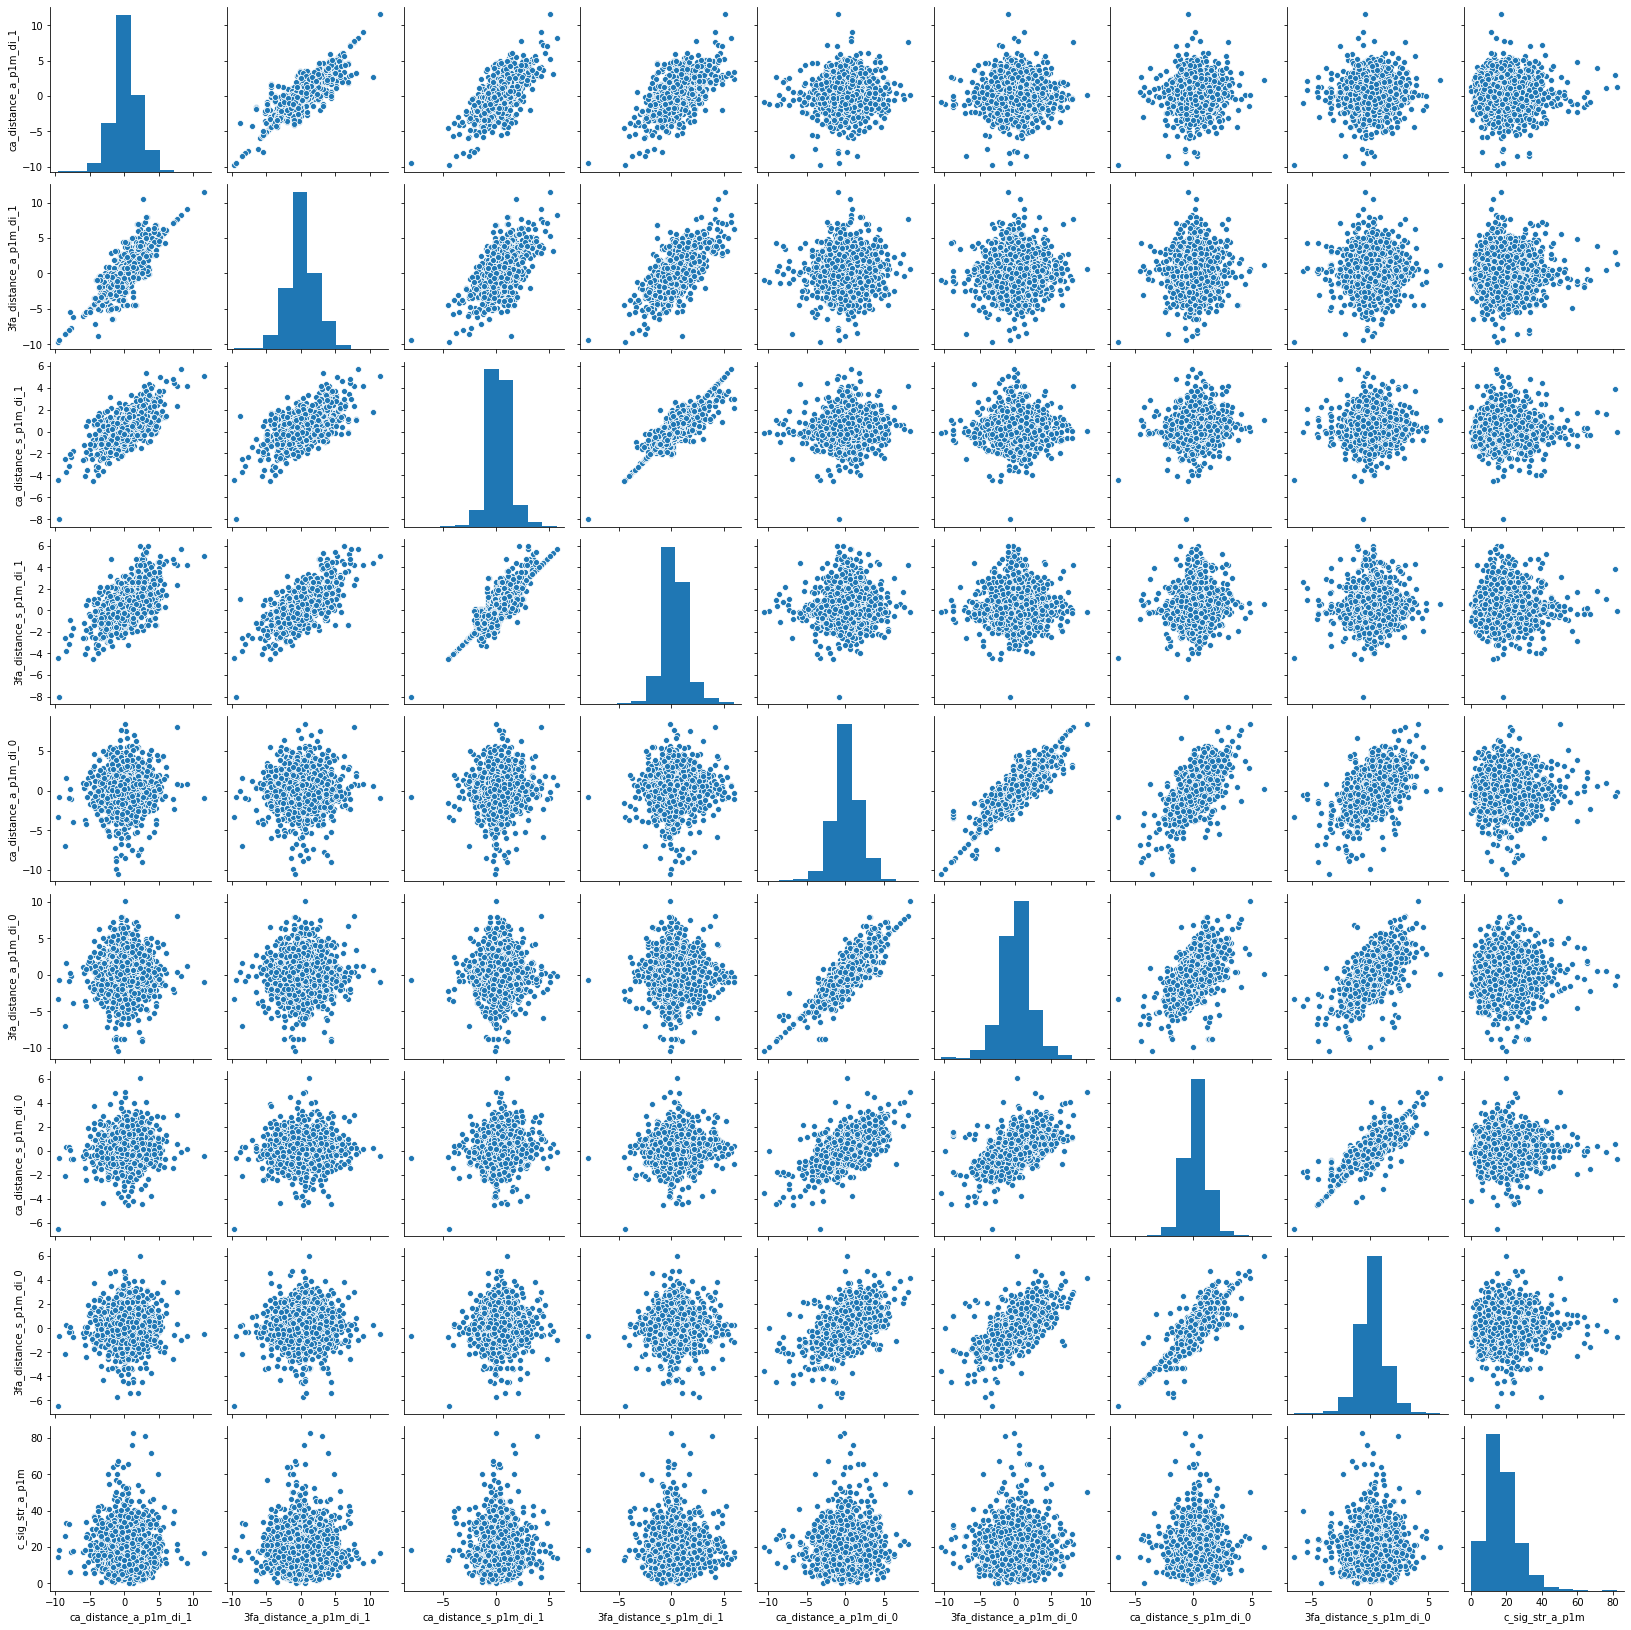

In [15]:
sns.pairplot(data_distance)

In [33]:
data_distance.corr()

,ca_distance_a_p1m_di_1,3fa_distance_a_p1m_di_1,ca_distance_s_p1m_di_1,3fa_distance_s_p1m_di_1,ca_distance_a_p1m_di_0,3fa_distance_a_p1m_di_0,ca_distance_s_p1m_di_0,3fa_distance_s_p1m_di_0,c_sig_str_a_p1m
ca_distance_a_p1m_di_1,1.000000,0.859345,0.687500,0.565511,0.040370,0.019738,0.055927,0.041655,0.010573
3fa_distance_a_p1m_di_1,0.859345,1.000000,0.591520,0.675860,0.040325,0.024587,0.040428,0.032171,0.018749
ca_distance_s_p1m_di_1,0.687500,0.591520,1.000000,0.844276,0.049416,0.026733,0.086860,0.059624,0.022073
3fa_distance_s_p1m_di_1,0.565511,0.675860,0.844276,1.000000,0.046597,0.032098,0.066628,0.057878,0.034728
ca_distance_a_p1m_di_0,0.040370,0.040325,0.049416,0.046597,1.000000,0.877301,0.629389,0.520088,0.024981
3fa_distance_a_p1m_di_0,0.019738,0.024587,0.026733,0.032098,0.877301,1.000000,0.552180,0.627694,0.024446
ca_distance_s_p1m_di_0,0.055927,0.040428,0.086860,0.066628,0.629389,0.552180,1.000000,0.838303,0.029169
3fa_distance_s_p1m_di_0,0.041655,0.032171,0.059624,0.057878,0.520088,0.627694,0.838303,1.000000,0.038115
c_sig_str_a_p1m,0.010573,0.018749,0.022073,0.034728,0.024981,0.024446,0.029169,0.038115,1.000000


# Sig Strikes

In [34]:
data.columns

Index(['ca_sig_str_a_p1m_0', '3fa_sig_str_a_p1m_0', 'ca_td_s_p15m_di_0',
       '3fa_td_s_p15m_di_0', 'ca_sig_str_s_p1m_di_0', '3fa_sig_str_s_p1m_di_0',
       'ca_sig_str_a_p1m_di_0', '3fa_sig_str_a_p1m_di_0',
       'ca_ground_s_p15m_di_0', '3fa_ground_s_p15m_di_0',
       'ca_ground_a_p15m_di_0', '3fa_ground_a_p15m_di_0',
       'ca_clinch_s_p15m_di_0', '3fa_clinch_s_p15m_di_0',
       'ca_clinch_a_p15m_di_0', '3fa_clinch_a_p15m_di_0',
       'ca_distance_a_p1m_di_0', '3fa_distance_a_p1m_di_0',
       'ca_distance_s_p1m_di_0', '3fa_distance_s_p1m_di_0',
       'ca_sig_str_a_p1m_1', '3fa_sig_str_a_p1m_1', 'ca_td_s_p15m_di_1',
       '3fa_td_s_p15m_di_1', 'ca_sig_str_s_p1m_di_1', '3fa_sig_str_s_p1m_di_1',
       'ca_sig_str_a_p1m_di_1', '3fa_sig_str_a_p1m_di_1',
       'ca_ground_s_p15m_di_1', '3fa_ground_s_p15m_di_1',
       'ca_ground_a_p15m_di_1', '3fa_ground_a_p15m_di_1',
       'ca_clinch_s_p15m_di_1', '3fa_clinch_s_p15m_di_1',
       'ca_clinch_a_p15m_di_1', '3fa_clinch_a_p15m_d

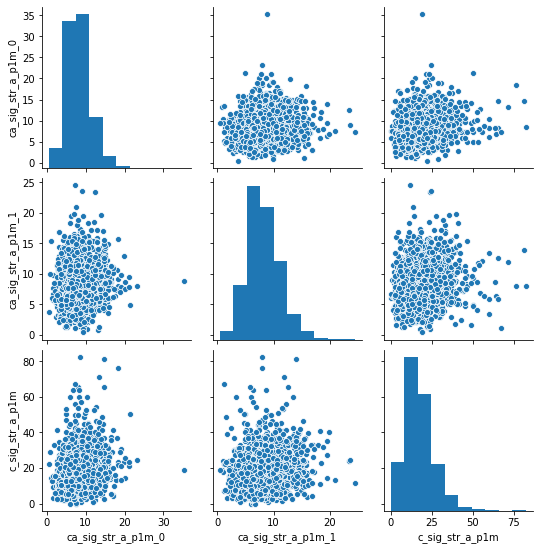

In [39]:
sig_str_stats = ['ca_sig_str_a_p1m_0',
                  'ca_sig_str_a_p1m_1',
                  'c_sig_str_a_p1m']

sig_str_data = data.loc[:,sig_str_stats]

sns.pairplot(sig_str_data)

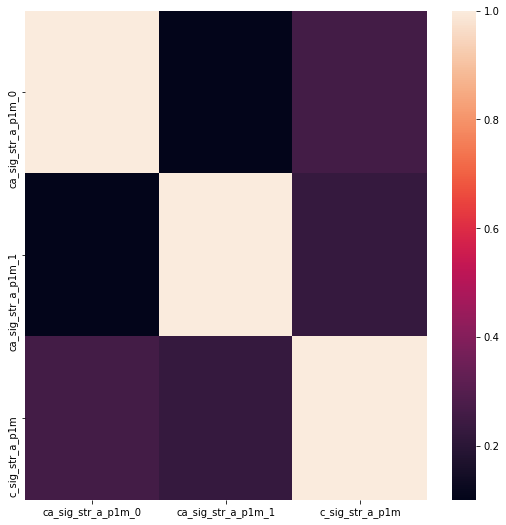

In [42]:
fig, ax = plt.subplots(1,1, figsize=(9,9))

sns.heatmap(sig_str_data.corr(), ax=ax)

plt.savefig('heatmap.png', transparency=True)

In [25]:
sig_str_data['ca_sig_str_a_p1m_dif'] = abs(sig_str_data['ca_sig_str_a_p1m_0'] - sig_str_data['ca_sig_str_a_p1m_1'])

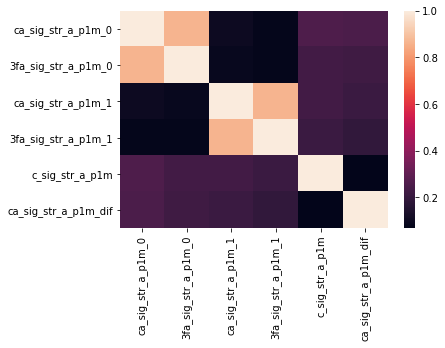

In [26]:
sns.heatmap(sig_str_data.corr())

In [29]:
sig_str_data['3fa_sig_str_a_p1m_avg'] = (sig_str_data['3fa_sig_str_a_p1m_0'] + sig_str_data['3fa_sig_str_a_p1m_1'])/2

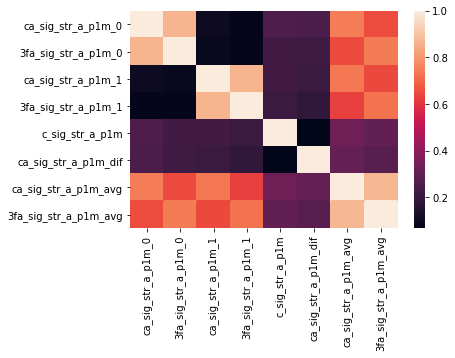

In [30]:
sns.heatmap(sig_str_data.corr())

In [31]:
sig_str_data.corr()

,ca_sig_str_a_p1m_0,3fa_sig_str_a_p1m_0,ca_sig_str_a_p1m_1,3fa_sig_str_a_p1m_1,c_sig_str_a_p1m,ca_sig_str_a_p1m_dif,ca_sig_str_a_p1m_avg,3fa_sig_str_a_p1m_avg
ca_sig_str_a_p1m_0,1.000000,0.867568,0.099955,0.076034,0.259654,0.251151,0.748265,0.650693
3fa_sig_str_a_p1m_0,0.867568,1.000000,0.087597,0.075741,0.230506,0.223210,0.649757,0.742020
ca_sig_str_a_p1m_1,0.099955,0.087597,1.000000,0.868495,0.228744,0.210640,0.734871,0.644435
3fa_sig_str_a_p1m_1,0.076034,0.075741,0.868495,1.000000,0.212481,0.188998,0.630886,0.724654
c_sig_str_a_p1m,0.259654,0.230506,0.228744,0.212481,1.000000,0.067871,0.329498,0.302155
ca_sig_str_a_p1m_dif,0.251151,0.223210,0.210640,0.188998,0.067871,1.000000,0.311632,0.281325
ca_sig_str_a_p1m_avg,0.748265,0.649757,0.734871,0.630886,0.329498,0.311632,1.000000,0.873196
3fa_sig_str_a_p1m_avg,0.650693,0.742020,0.644435,0.724654,0.302155,0.281325,0.873196,1.000000
